In [43]:
# Student Name - Id
# Dima Kanawati - 1917074
# Hadeel Abuhamous - 2006291

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('mushrooms.csv')

In [46]:
# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(data.head())

# Get information about the dataset
print("\nInformation about the dataset:")
print(data.info())

First few rows of the dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w  

Preprocessing pipeline:
This cell defines a preprocessing pipeline that handles missing values, encodes categorical variables using one-hot encoding, and scales numeric features using standardization. The pipeline is designed to prepare the data for training machine learning models, ensuring that it is properly preprocessed and ready for use with various algorithms such as Random Forest, SVM, and Decision Tree classifiers.

In [47]:
# Define preprocessing steps for numeric and categorical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data using preprocessing pipeline
X_preprocessed = preprocessing_pipeline.fit_transform(data)

In [48]:
# Separate features (X) and target variable (y)
X = data.drop('class', axis=1)  # Features (all columns except 'class')
y = data['class']  # Target variable

In [49]:
# Convert categorical variables into numerical format using one-hot encoding
X = pd.get_dummies(data)

In [50]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [51]:
# Instantiate the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
# Lists to store accuracies
train_accuracies = []
test_accuracies = []

In [54]:
# Cross-validation loop
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the classifier on preprocessed training fold data
    knn.fit(X_train_fold, y_train_fold)

    # Predict using preprocessed training and testing fold data
    y_train_pred = knn.predict(X_train_fold)
    y_test_pred = knn.predict(X_test_fold)

    # Evaluate accuracy
    train_accuracy = accuracy_score(y_train_fold, y_train_pred)
    test_accuracy = accuracy_score(y_test_fold, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

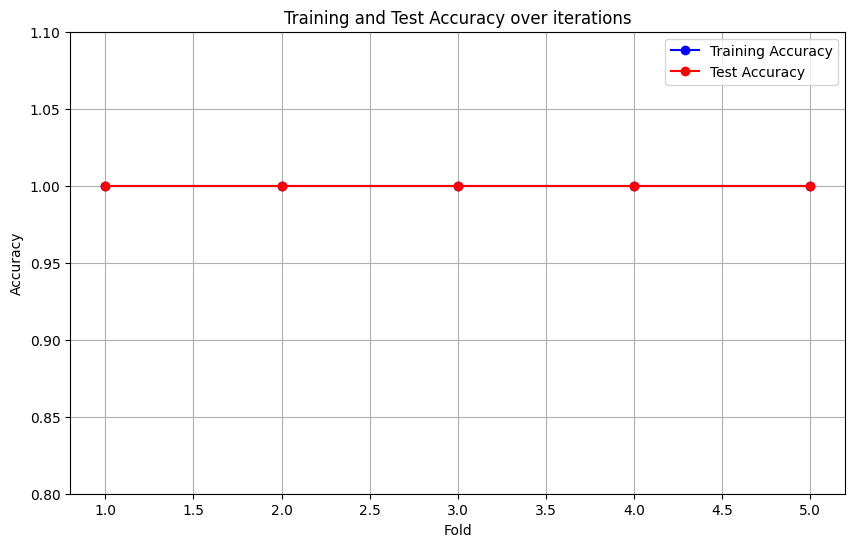

In [55]:
# Plotting training and test accuracies over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.ylim(0.8, 1.1)
plt.title('Training and Test Accuracy over iterations')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Fit the classifier on preprocessed training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# Predict using preprocessed testing data
y_pred = knn.predict(X_test)

In [58]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



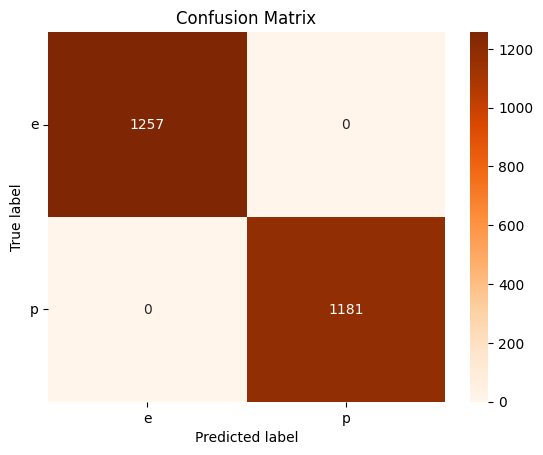

In [59]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g', xticklabels=['e', 'p'], yticklabels=['e', 'p'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.yticks(rotation=0)
plt.show()

In [60]:
# Create a DataFrame to display actual and predicted labels
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(results)

     Actual Predicted
1971      e         e
6654      p         p
5606      p         p
3332      e         e
6988      p         p
...     ...       ...
462       e         e
1956      e         e
3781      p         p
799       e         e
2402      e         e

[2438 rows x 2 columns]
